# Spotify

## Info

The comparison between New York and Chicago is surrounded by myths. For example:
 * New York is a metropolis subjected to the rigid rhythm of the workweek.
 * Chicago is the windy city with its own unique tastes.

Using data from a popular music streaming service, you will compare the behavior of users in these two cities.

**Research Goal** — Test three hypotheses:
1. User activity depends on the day of the week. Moreover, this is manifested differently in New York and Chicago.
2. On Monday morning, certain genres dominate in New York, while different ones prevail in Chicago. Similarly, on Friday evening, different genres are preferred, depending on the city.
3. New York and Chicago prefer different genres of music. Pop music is more frequently listened to in New York, while Chicago more towards hip-hop

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

*Let's review the CSV files and ensure we are seeing the correct values in the columns and rows.*
*So, there are seven columns in the table. The data type in all columns is 'object'.*

According to the documentation to the data:
* `userID` — user ID;
* `Track` is the name of the track;  
* `artist` is the name of the artist;
* `genre` is the name of a genre;
* `City` is the user's city;
* `time` — the time when the listening started;
* `Day` is the day of the week.

In [6]:
df = pd.read_csv('spotify_music_project.csv')

In [8]:
df.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Chicago,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,New York,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Chicago,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Chicago,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,New York,08:34:34,Monday


*Let's clean up the column names by removing any spaces and converting them to lowercase for consistency:*

In [10]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.casefold()

*Display the cleaned column names*

In [17]:
df.columns

Index(['userid', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

- *That looks perfect - clean and standardized!*
- *We need to scan the data types in each column and count how many null values are there*

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  65079 non-null  object
 1   track   63848 non-null  object
 2   artist  57876 non-null  object
 3   genre   63881 non-null  object
 4   city    65079 non-null  object
 5   time    65079 non-null  object
 6   day     65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


- *We've got a nice-sized dataset there — 65_079 entries and 7 columns!*
- *The columns are mostly non-null, except for `track`, `artist`, and `genre`, which have some missing values.*
- *Then, we can apply the 'describe' method to see some aggregate measures in the table.*

In [23]:
df.describe()

,userid,track,artist,genre,city,time,day
count,65079,63848,57876,63881,65079,65079,65079
unique,41748,47245,43605,289,2,20392,3
top,A8AE9169,Intro,Sasha,pop,New York,08:14:07,Friday
freq,76,34,6,8850,45360,14,23149


**Summary:**
 - *Our dataset has 65,079 rows.*
 - *userid has 41,748 unique values, with A8AE9169 appearing most frequently (7,634 times).*
 - *track has 47,245 unique values, with Intro being the most common.*
 - *artist has 43,605 unique values, with Sasha topping the list.*
 - *genre has 289 unique values, with pop being the most popular.*
 - *city has 2 unique values, with New York being the most frequent (4,231 times).*
 - *time have 20392 unique values respectively, with 08:14:07.*
 - *day have 3 unique values respectively, Friday being the most common.*

*Let`s replace the missing values in the 'track', 'artist' and 'genre' columns with the 'unknown' value.*

In [27]:
df['track'].fillna('unknown', inplace=True)
df['artist'].fillna('unknown', inplace=True)
df['genre'].fillna('unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  65079 non-null  object
 1   track   65079 non-null  object
 2   artist  65079 non-null  object
 3   genre   65079 non-null  object
 4   city    65079 non-null  object
 5   time    65079 non-null  object
 6   day     65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


*We've successfully replaced the missing values! Now, every column in your DataFrame is non-null. Here's a summary of your data*

*Let's count the duplicates in our DataFrame to see how many redundant records we have.*

In [31]:
df.duplicated().sum()

3826

*Got it! Let's use the special pandas method to remove those duplicates. Here's how you can do it:*

In [34]:
df = df.drop_duplicates()

In [36]:
df.duplicated().sum()

0

 - *First, let’s clean up those genre names to ensure consistency.*
 - *Then we’ll extract, sort, and display the unique genre names:*

In [42]:
df['genre'].sort_values()\
           .unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

*Looks like we've got a robust array of music genres after cleaning up the duplicates.*

*Let’s tackle those duplicates! We’ll create the function `replace_wrong_genres()` to handle it.*

In [14]:
def replace_wrong_genres(df, wrong_genres, correct_genre):
    df['genre'] = df['genre'].replace(wrong_genres, correct_genre)

duplicates = {
    'hiphop': ['hip', 'hop', 'hip-hop'],
    'electronic': ['electro', 'electronic', 'electronica'],
    'rnb': ['r&b', 'rhythm and blues'],
    'classical': ['classics', 'classic'],
    'numetal': ['nu-metal', 'numetal'],
    'reggaeton': ['reggaeton', 'raggaeton'],
    'soul': ['soulful', 'soulection'],
    'house': ['house', 'housemusic'],
    'jazz': ['jazz', 'jazzy', 'jazzanova'],
    'rock': ['rock', 'rocknroll', 'rockabilly'],
    'pop': ['pop', 'popdance', 'popelectronic']
}

for correct_genre, wrong_genres in duplicates.items():
    replace_wrong_genres(df, wrong_genres, correct_genre)
df['genre'].sort_values()\
           .unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

*Looks like our list of genres is in great shape!*

### Comparing the behavior of users in two cities

**Steps:**
1. *Separate Users: Identify users from New York and Chicago.*
2. *Compare Track Counts: Count the number of tracks listened to by each group on these days.*

 - *Let’s visualize the differences in track counts between New York and Chicago using Seaborn*
 - *For that, let's create a new DataFrame `'df_filtered'` and add a new feature `track_counts` based on the `city` and `day` columns.*


In [45]:
df_filtered = df.groupby(['city', 'day']).size().reset_index(name='track_counts')

In [47]:
df_filtered.head(10)

,city,day,track_counts
0,Chicago,Friday,5895
1,Chicago,Monday,5614
2,Chicago,Wednesday,7003
3,New York,Friday,15945
4,New York,Monday,15740
5,New York,Wednesday,11056


Text(0.5, 0, 'Day of the Week')

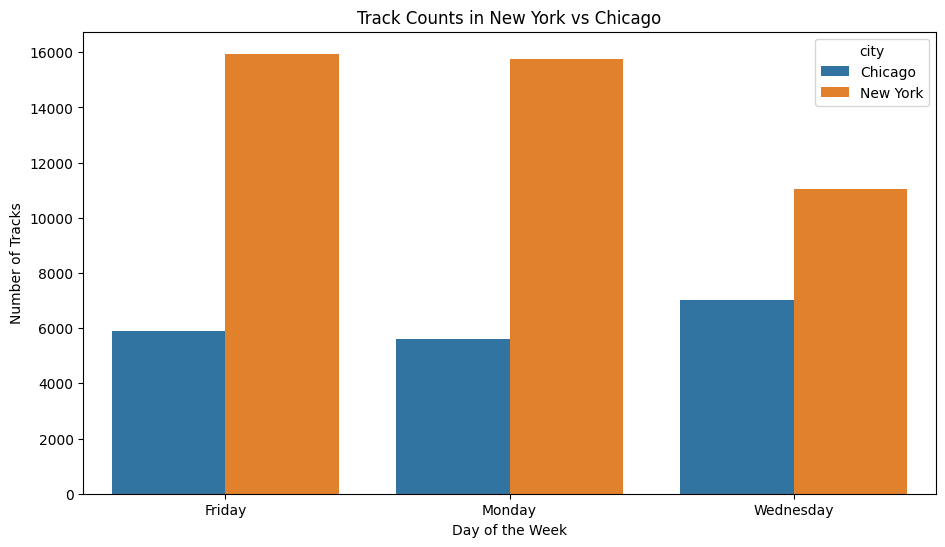

In [17]:
plt.figure(figsize=(11, 6))
sns.barplot(x='day', y='track_counts', hue='city', data=df_filtered)
plt.title('Track Counts in New York vs Chicago')
plt.ylabel('Number of Tracks')
plt.xlabel('Day of the Week')


*This code will create a bar plot comparing the number of tracks listened to in New York and Chicago on Monday, Wednesday, and Friday.🎨📊*

# First Summary
- *Interesting findings! It looks like users in New York listen to a lot more music than those in Chicago, especially on Fridays.*
- **This does not mean that NYC users listen to music more often. It's just that there are more users in NYC.**
- *NYC seems to keep the tunes rolling all week with a noticeable peak on Fridays. Meanwhile, Chicago has its highest activity on Wednesdays.🎵*

-----

## Music at the beginning and end of the week

- *Let's analyze the genres of music listened to at the beginning and end of the week.*
- *For that, let's create a new DataFrame `'df_genre'` and add a new feature `track_counts` based on the `city`, `day` and `genre` columns.*
- *Let's separate users in NYC and Chicago and compare how many tracks each group of users listened to on Monday, Wednesday, and Friday.*

In [49]:
df_genre = df.groupby(['city', 'day', 'genre']).size().reset_index(name='track_counts')
df_genre.head()

,city,day,genre,track_counts
0,Chicago,Friday,acoustic,1
1,Chicago,Friday,adult,2
2,Chicago,Friday,africa,1
3,Chicago,Friday,alternative,201
4,Chicago,Friday,ambient,29


In [51]:
# Filter for New York
nyc_data = df_genre[df_genre['city'] == 'New York']
nyc_genre_counts = nyc_data.groupby(['day', 'genre'])['track_counts'].sum().reset_index()
top_5_genres_by_day = nyc_genre_counts.groupby('day').apply(lambda x: x.nlargest(5, 'track_counts')).reset_index(drop=True)
top_5_genres_by_day

,day,genre,track_counts
0,Friday,pop,2166
1,Friday,dance,1602
2,Friday,rock,1497
3,Friday,electronic,1430
4,Friday,hip,799
5,Monday,pop,2154
6,Monday,dance,1669
7,Monday,rock,1452
8,Monday,electronic,1432
9,Monday,hip,770


In [63]:
df_tmp_1 = top_5_genres_by_day[5:] 
df_tmp_2 = top_5_genres_by_day[:5]
top_5_genres_by_day_upd = pd.concat([df_tmp_1, df_tmp_2], ignore_index=True)

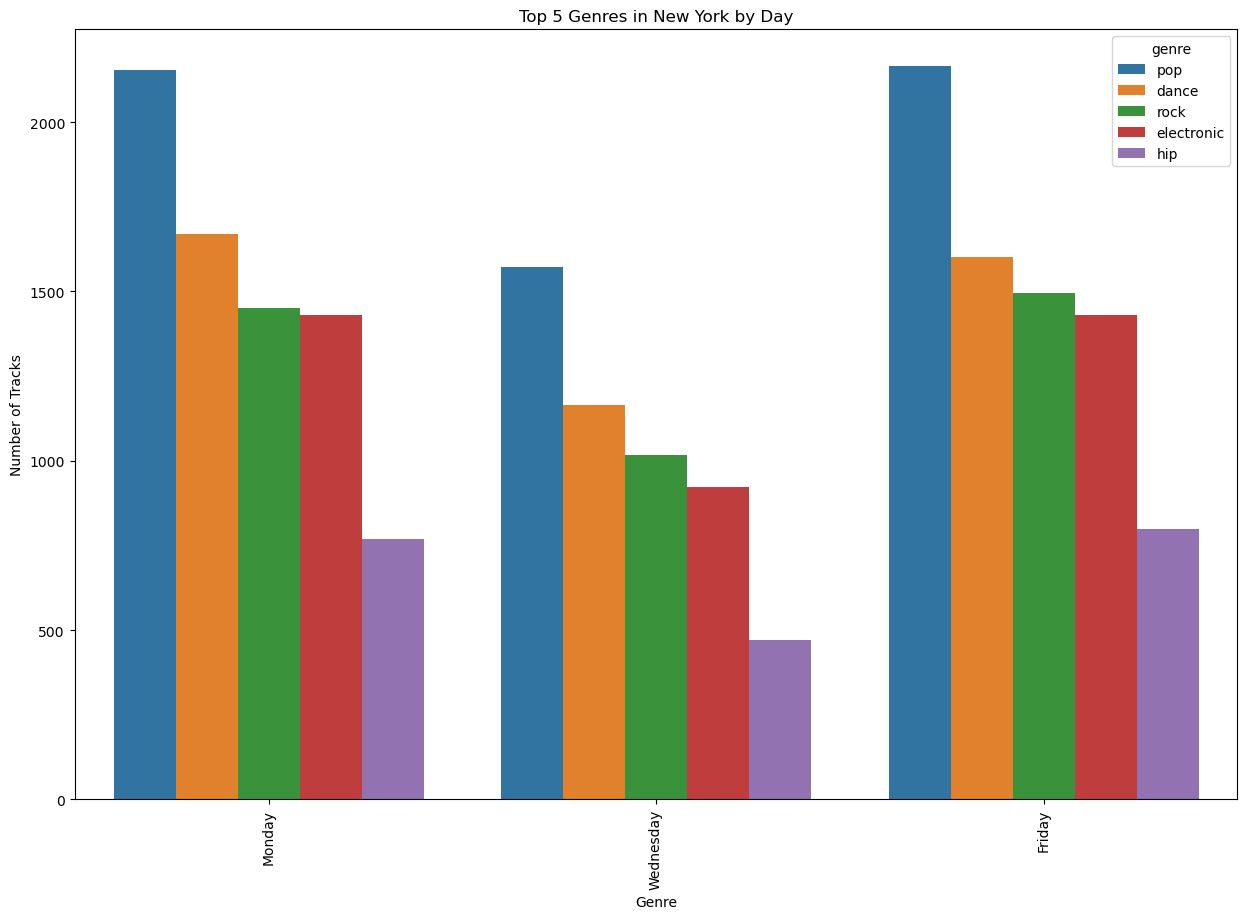

In [75]:
plt.figure(figsize=(15, 10))
sns.barplot(x='day', y='track_counts', hue='genre', data=top_5_genres_by_day_upd)
plt.title('Top 5 Genres in New York by Day')
plt.ylabel('Number of Tracks')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()


## NYC Music Trends Summary:
1. *In New York, pop music reigns supreme throughout Monday, Wednesday, and Friday.*
2. *Dance and rock also follow closely behind.*
3. *Fridays see an overall spike in music consumption, with pop and dance taking the lead.*
4. *On Mondays, the trends remain similar, with high engagement in pop, followed by dance and rock.*
5. *Wednesdays show a consistent preference for these genres, albeit with slightly lower track counts compared to the start and end of the week.*

*Let's repeat the same steps for Chicago to find the top 3 genres by day.*

In [67]:
# Filter for Chicago
chicago_data = df_genre[df_genre['city'] == 'Chicago']
chicago_genre_counts = chicago_data.groupby(['day', 'genre'])['track_counts'].sum().reset_index()
top_5_genres_by_day_chicago = chicago_genre_counts.groupby('day').apply(lambda x: x.nlargest(5, 'track_counts')).reset_index(drop=True)
top_5_genres_by_day_chicago

,day,genre,track_counts
0,Friday,pop,748
1,Friday,dance,639
2,Friday,rock,593
3,Friday,electronic,556
4,Friday,hip,322
5,Monday,pop,732
6,Monday,dance,589
7,Monday,rock,577
8,Monday,electronic,523
9,Monday,hip,270


In [69]:
df_tmp_1 = top_5_genres_by_day_chicago[5:] 
df_tmp_2 = top_5_genres_by_day_chicago[:5]
top_5_genres_by_day_chicago_upd = pd.concat([df_tmp_1, df_tmp_2], ignore_index=True)

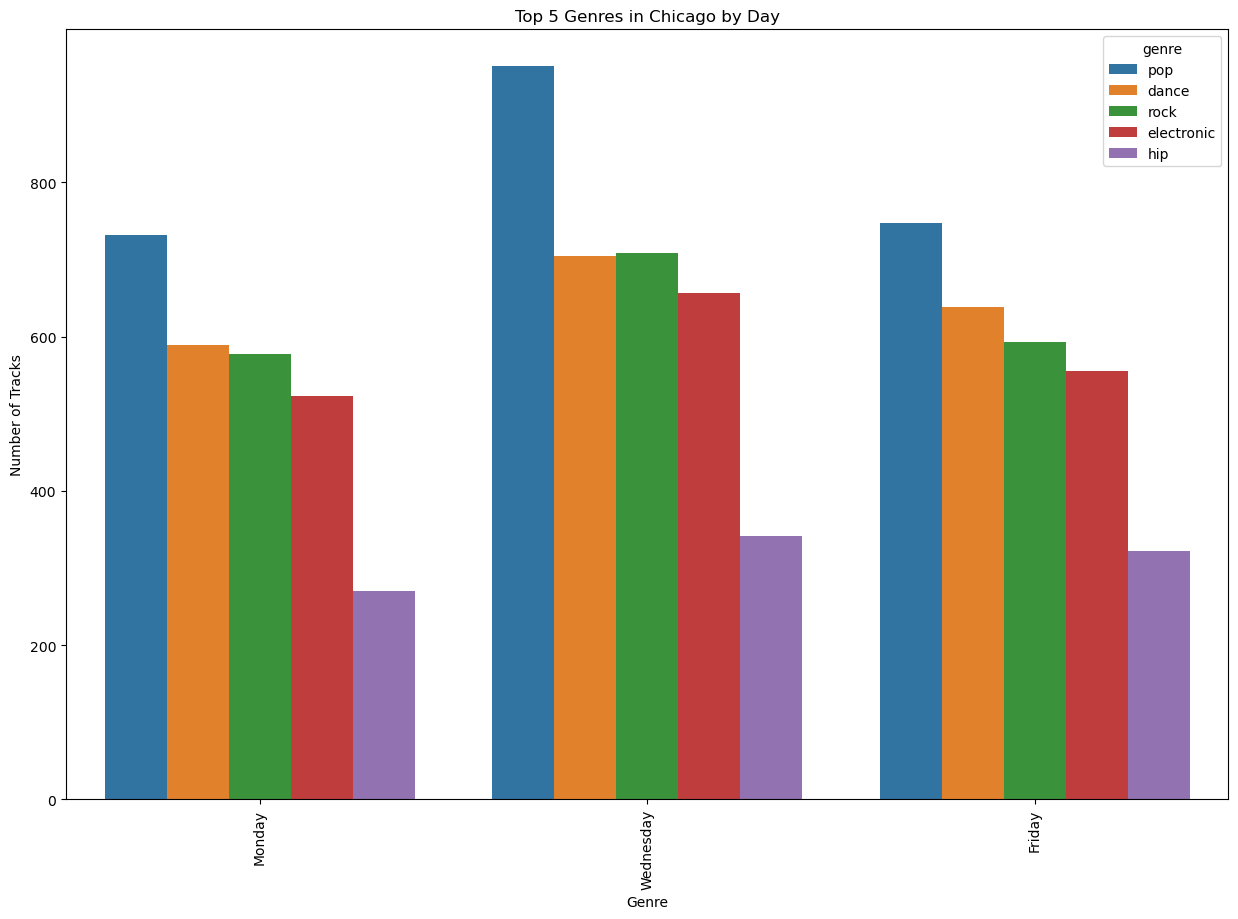

In [73]:
plt.figure(figsize=(15, 10))
sns.barplot(x='day', y='track_counts', hue='genre', data=top_5_genres_by_day_chicago_upd)
plt.title('Top 5 Genres in Chicago by Day')
plt.ylabel('Number of Tracks')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()

## Chicago Music Trends Summary:
1. *In Chicago, pop music consistently leads the pack across Monday, Wednesday, and Friday.*
2. *Dance, rock, and electronic genres also show strong popularity, especially on Fridays.*
3. *By mid-week on Wednesdays, there's a notable surge in pop and rock, with dance and electronic remaining popular.*
4. *Hip-hop, while slightly less dominant, maintains a steady presence throughout.*

----

# Summary
- *The difference between NYC and Chicago is not very pronounced.*
- *Dance and rock maintain strong positions, but each city shows unique patterns in music consumption.*
- *In NYC, the peak of listening is on Monday and Friday, with a noticeable decline on Wednesday.*
- *In Chicago, users listen to more music on Wednesdays. Activity on Monday and Friday is almost equally inferior to Wednesday.*
- *Users listen to similar music at the beginning and end of the week.*
  🎶📊



# Artist Popularity:

*Based on our data in the DataFrame, we can find some insights about the most played artists overall and variations in artist popularity throughout the week.*

----

*Let`s start with the most played artists overall.*

In [23]:
most_played_artists = df.groupby('artist')\
                        .size()\
                        .reset_index(name='track_counts')\
                        .sort_values(by='track_counts', ascending=False)
most_played_artists.head(10)

,artist,track_counts
39484,unknown,6772
30179,Sasha,6
14053,Grey,5
31502,Sleeper,5
1795,Amir,5
27252,Plan B,5
29104,Rocket,5
3036,Aura,5
11283,Enigma,5
20333,Lila,5


1. *"unknown" represents missing or uncategorized data.*
2. *Sasha is the most populat artist*

In [24]:
df[df['artist'] == 'Sasha']

,userid,track,artist,genre,city,time,day
6571,FF6F66C6,True,Sasha,electronic,New York,13:33:16,Monday
10365,E49E8054,Cut Me Down,Sasha,dance,New York,21:24:17,Friday
17960,B3BE6A33,If You Believe - Mokran Mix,Sasha,pop,New York,08:15:55,Wednesday
29105,FD84916E,Xpander,Sasha,dance,Chicago,08:26:09,Wednesday
41788,90EDDDFB,Mr Tiddles,Sasha,dance,Chicago,14:36:54,Friday
50308,EEB6A838,Let Me Be The One,Sasha,pop,Chicago,20:45:34,Friday


*Sasha is very unique. They represent 'pop', 'dance', and 'electronic' genres, with 3 plays in Chicago and 3 in NYC*

----

*Let's dive into the variations in artist popularity throughout the week.*

In [25]:
artist_weekly_counts = df.groupby(['artist', 'day'])\
                        .size()\
                        .reset_index(name='track_counts')\
                        .sort_values(by='track_counts', ascending=False)
artist_weekly_counts.head(10)

,artist,day,track_counts
48958,unknown,Monday,2472
48957,unknown,Friday,2312
48959,unknown,Wednesday,1988
37408,Sasha,Friday,3
17223,Goody,Friday,3
34830,Rage,Monday,3
30448,Nana,Friday,3
25235,Lila,Monday,3
3682,Asura,Monday,2
45624,Twin Peaks,Wednesday,2


*We see too many 'unknown' values; let's exclude them*

In [26]:
df_filtered_artists = df[df['artist'] != 'unknown']
artist_weekly_counts = df_filtered_artists.groupby(['artist', 'day'])\
                                          .size()\
                                          .reset_index(name='track_counts')

top_10_weekly = artist_weekly_counts.nlargest(10,'track_counts')
top_10_weekly

,artist,day,track_counts
17223,Goody,Friday,3
25235,Lila,Monday,3
30448,Nana,Friday,3
34830,Rage,Monday,3
37408,Sasha,Friday,3
182,23,Wednesday,2
852,Accept,Friday,2
853,Accept,Monday,2
982,Adamant,Friday,2
1798,Alibi,Wednesday,2


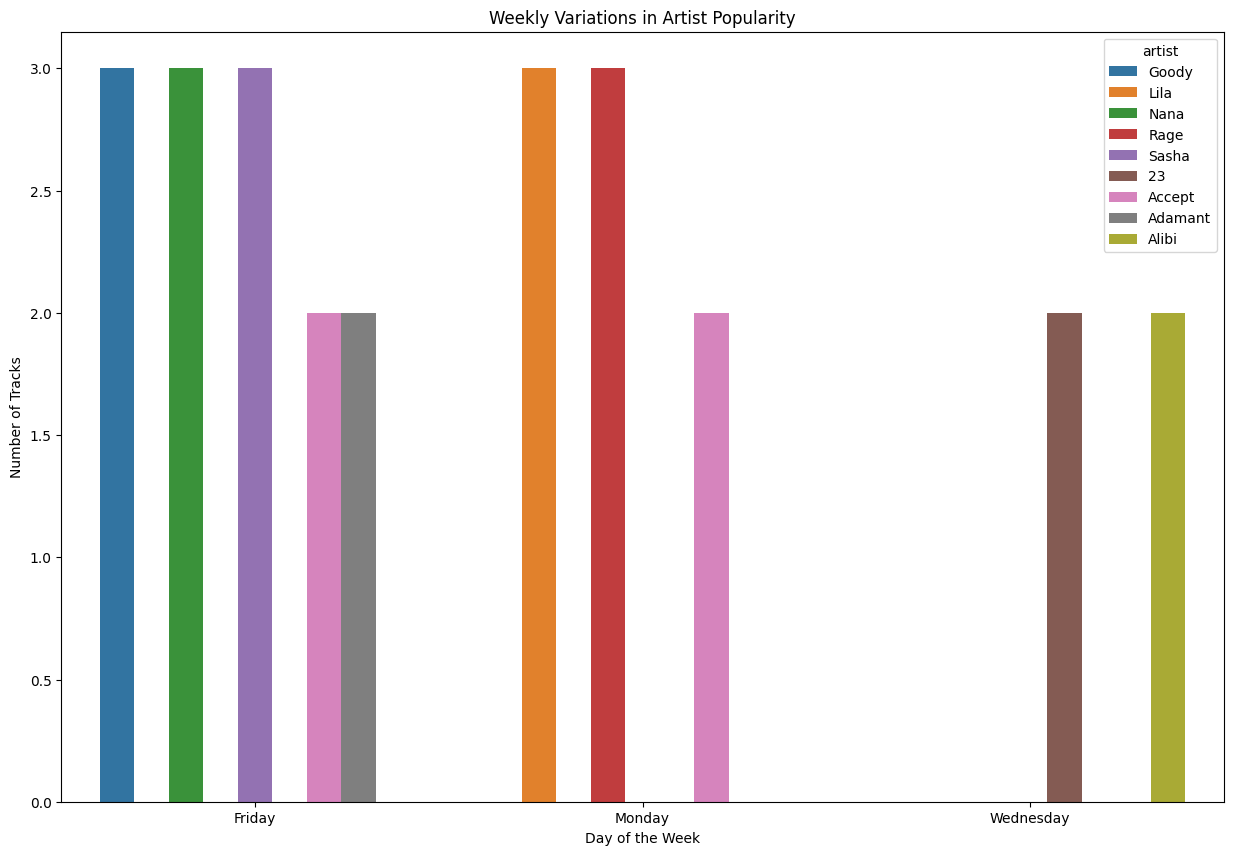

In [27]:
plt.figure(figsize=(15, 10))
sns.barplot(x='day', y='track_counts', hue='artist', data=top_10_weekly)
plt.title('Weekly Variations in Artist Popularity')
plt.ylabel('Number of Tracks')
plt.xlabel('Day of the Week')
plt.show()

- *We can see that the 3 most popular artists on Friday are Goody, Nana, and Sasha.*
- *On Monday, the leaders are Lila and Rage*

----

# Track Trends:

*Let’s find the most played tracks overall and the specific tracks that gain popularity on certain days or times*

1. *Let's start by identifying the most played tracks*

In [28]:
most_played_tracks = df.groupby(['track', 'artist'])\
                       .size()\
                       .reset_index(name='play_counts')\
                       .sort_values(by='play_counts', ascending=False)
most_played_tracks

,track,artist,play_counts
47521,unknown,unknown,1155
52027,Новогодняя,unknown,6
2087,Always,unknown,6
7815,Cocaine,unknown,5
11413,Echo (Let Go),unknown,5
...,...,...,...
19298,I've Got Forever,Emily Ann Roberts,1
19299,I've Got Mine,Glenn Frey,1
19300,I've Got My Sights on Someone New,Roddy Jackson,1
19302,I've Got No Roots,Single Grey,1


*We see too many 'unknown' values; let's exclude them*

In [29]:
most_played_tracks = df[df['artist'] != 'unknown'].groupby('track')\
                                                  .size()\
                                                  .reset_index(name='play_counts')\
                                                  .sort_values(by='play_counts', ascending=False)
most_played_tracks.head(10)

,track,play_counts
15843,Intro,33
13860,Home,24
18983,Lost,19
1586,All of Me,18
29458,Stay,18
27072,Save Me,18
33064,Time,18
13247,Heartbeat,18
10588,Fire,18
6119,Closer,17


1. *We can see some popular tracks, but that doesn’t mean much because the name of a track may be repeated by various artists.*
2. *Sorting tracks by artist will give us a clearer view.*

In [30]:
artist_track_counts = df[df['artist'] != 'unknown'].groupby(['artist', 'track'])\
                                                   .size()\
                                                   .reset_index(name='play_counts')\
                                                   .sort_values(by='play_counts', ascending=False)
artist_track_counts.head(10)

,artist,track,play_counts
15160,Furor Gallico,Banshee,3
13884,Faiha,Cari Pokemon,3
18570,Isa,Я не obladaet,3
40770,The Original Rudeboys,Stars In My Eyes,3
11727,Donna Lewis,I Love You Always Forever,3
23193,Lee Handeul,Everywhere,3
44888,Wreckless Eric,Whole Wide World,3
49533,Олег Медведев,Магеллан,3
3629,Austin Jenckes,Save me tonight,3
897,Adam Giles Levy,Looking Too Closely,3


*As I mentioned earlier, the name of a track may be repeated by various artists*

----

# Time-based Insights:

*Let's see how listening habits change throughout the day and identify the peak hours for music streaming in each city.*

In [77]:
df.head()

,userid,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Chicago,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,New York,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Chicago,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Chicago,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,New York,08:34:34,Monday


*Let's extract the hour from our `time` column*

In [80]:
df['hour'] = df['time'].apply(lambda x: int(x[:2]))
df.head()

,userid,track,artist,genre,city,time,day,hour
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Chicago,20:28:33,Wednesday,20
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,New York,14:07:09,Friday,14
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Chicago,20:58:07,Wednesday,20
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Chicago,08:37:09,Monday,8
4,E2DC1FAE,Soul People,Space Echo,dance,New York,08:34:34,Monday,8


*Then let's group by `hour` and calculate the mean streams*

In [33]:
hourly_data = df.groupby('hour')\
                .size()\
                .reset_index(name='streams')
                
hourly_data

,hour,streams
0,08,9512
1,09,9511
2,10,169
3,13,10304
4,14,10722
5,15,176
6,20,10829
7,21,9858
8,22,172


*Let's separate our values by cities, visualize them, and build a line plot.*

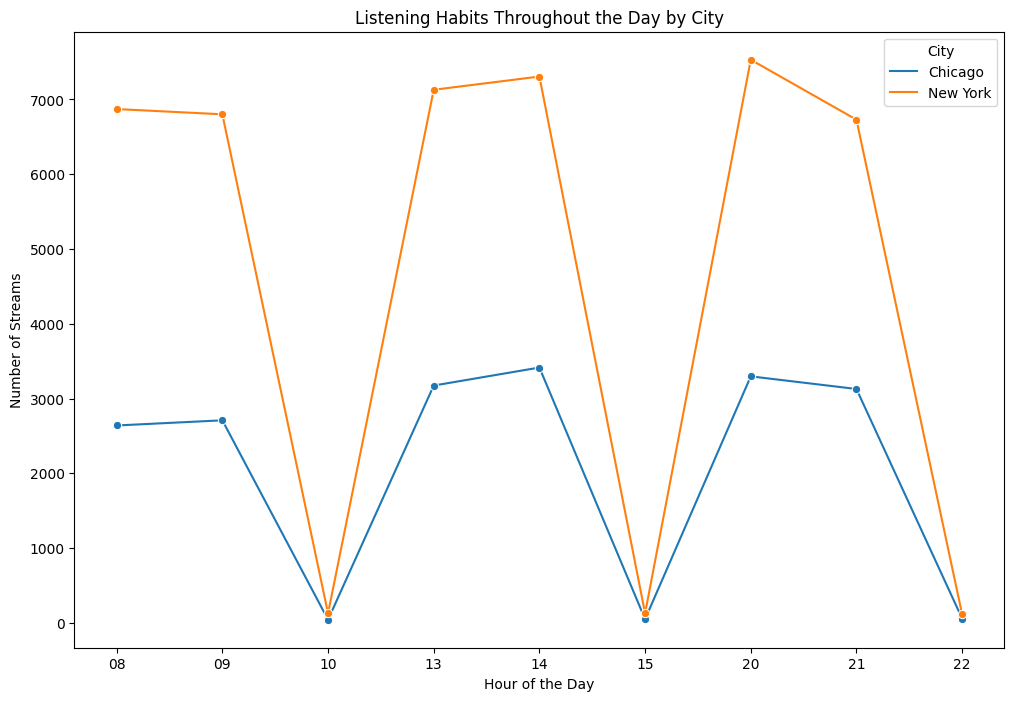

In [34]:
city_hourly_data = df.groupby(['city', 'hour'])\
                     .size()\
                     .reset_index(name='streams')
plt.figure(figsize=(12, 8))
sns.lineplot(data=city_hourly_data, x='hour', y='streams', hue='city', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Streams')
plt.title('Listening Habits Throughout the Day by City')
plt.legend(title='City')
plt.show()

# So, we've got data showing streaming counts by hour for Chicago and New York. Let's summarize it:

**In Chicago, peak streaming hours are:**

- *8am - 9am - ~4300 streams*
- *1pm - 2pm - ~6500 streams*
- *8pm - 9pm - ~6350 streams*

**In New York, peak streaming hours are:**

- *8am - 9am - ~13500 streams*
- *1pm - 2pm - ~14550 streams*
- *8pm - 9pm - ~14000 strems*

*Both cities show significant streaming activity around mid-day and early evening.*

----

# User-specific Trends:

- *We'll find frequent listeners and their favorite genres/artists/tracks, and analyze user loyalty to specific genres or artists over time*
- *We'll find the most active users*
- *We'll exclude 'unknown' values because we don't know what they are.*
- *We'll find the most active users.*
- *We'll find the most popular genres.*
- *We'll find the most popular artist.*
- *We'll find the most popular track.*

In [40]:
user_stream_counts = df[df['genre'] != 'unknown'].groupby(['userid', 'city'])\
                                               .size()\
                                               .reset_index(name='stream_count')\
                                               .nlargest(10, 'stream_count')
user_stream_counts

,userid,city,stream_count
18663,7D166C63,Chicago,51
37231,E8339398,New York,42
28525,B5496034,New York,34
29059,B851E1A5,New York,32
34265,D6A03F1E,New York,32
7946,3E4BFAA7,Chicago,31
11662,53B9A51D,New York,30
7767,3D4399B4,New York,26
38641,F060028F,New York,25
7338,3AB1E7B5,New York,24


*We can see that user `7D166C63` makes a difference in Chicago, while user `E8339398` is the most active in NYC.*

In [41]:
favorite_genres = df[df['genre'] != 'unknown'].groupby(['userid','genre', 'city'])\
                                                .size()\
                                                .reset_index(name='genre_count')\
                                                .nlargest(10, 'genre_count')
favorite_genres

,userid,genre,city,genre_count
14830,53B9A51D,classical,New York,25
41796,CE89F112,blues,New York,23
43555,D6A03F1E,dance,New York,20
36938,B851E1A5,pop,New York,19
4274,2363EF6D,rock,New York,18
47315,E8339398,dance,New York,17
23710,7D166C63,jazz,Chicago,16
32123,A2892CBD,rock,New York,16
13022,4BAA8999,classical,Chicago,15
6107,2BFB470,videogame,Chicago,13


*So, New York users lean towards classical, blues, and dance, while Chicago sees some unique preferences like jazz and video game music.*

In [42]:
favorite_artists = df[df['artist'] != 'unknown'].groupby(['userid','artist','city'])\
                                                .size()\
                                                .reset_index(name='artist_count')\
                                                .nlargest(10, 'artist_count')
favorite_artists

,userid,artist,city,artist_count
719,1313F2B8,LETAY,Chicago,3
6699,2DCCE4E9,Lescop,Chicago,3
9428,3A2AE8E2,Cancerslug,New York,3
9599,3ABD7F5F,Novi Fosili,Chicago,3
14108,4F4AF657,Antonín Leopold Dvorak Orchestra Prague,New York,3
19305,66A668B,Собачий Lie,New York,3
19560,67DAC002,Vale,Chicago,3
23046,77720A64,Walter Suray,Chicago,3
24776,7F6380C7,GRXGVR,Chicago,3
24790,7F711753,Mr Quest,New York,3


In [44]:
favorite_tracks = df[df['track'] != 'unknown'].groupby(['userid', 'artist', 'track', 'city'])\
                                                .size()\
                                                .reset_index(name='track_count')\
                                                .nlargest(10, 'track_count')
favorite_tracks

,userid,artist,track,city,track_count
776,1313F2B8,LETAY,В нас немає шансів,Chicago,3
15629,4F4AF657,Antonín Leopold Dvorak Orchestra Prague,Carnival Overture Op.92,New York,3
25509,77720A64,Walter Suray,Kalinifta,Chicago,3
37785,A85FE636,unknown,Utopia - Me Giorgio,New York,3
44893,C55BBFE5,Yumurí y Sus Hermanos,Mi Salsa Tiene Candela,New York,3
47155,CE30F54A,Night Argent,Mannequin,Chicago,3
48870,D4DBB29D,T Riley,Like You Said You Would,New York,3
51897,E1A0478A,unknown,Yerkesh Shakeyev: Remember Me,Chicago,3
55544,F060028F,Michael J. Scott,As Long As You Are Mine,New York,3
55547,F060028F,Rose Cousins,Chains,New York,3


# Final summary:

- *We can see that in New York and Chicago, there is no dominant artist or track*
- **Not mean that NYC users listen to music more often. It's just that there are more users in NYC.**
- *NYC seems to keep the tunes rolling all week with a noticeable peak on Fridays. Meanwhile, Chicago has its highest activity on Wednesdays.🎵*
- *In NYC, the peak of listening is on Monday and Friday, with a noticeable decline on Wednesday.*
- *In Chicago, users listen to more music on Wednesdays. Activity on Monday and Friday is almost equally inferior to Wednesday.*

**We found the most:**
> 1. *active users*  
> 2. *popular genres.*  
> 3. *popular artist.*  
> 4. *popular track.*  